# FORWARD PROPOGATION

In [103]:
import numpy as np
import scipy.linalg as sla
import numpy.linalg as nla
from scipy.linalg import null_space
import matplotlib.pyplot as plt

Input Layer- Linear transformation
FEATURE SELECTION -COLUMN TYPE- Supported by Keras
Each row in the matrix is treated as a sample
Each column in the matrix is treated as a feature
We consider 1 image at a time. 
Each sample forms a basis in R10

In [47]:
A=np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,25,67,210,12,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,10,100,50,80,90,150,0,0],[5,0,0,110,0,246,143,0,130,0],[0,0,0,0,250,210,120,0,0,0],[0,0,140,30,230,0,186,0,0,0],[0,0,0,30,230,0,186,0,0,0],[0,0,10,0,20,0,1,0,0,0],[0,0,0,0,0,0,0,0,0,0]])
print(A)
print(A.shape)
print(A.ndim)

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  25  67 210  12   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0  10 100  50  80  90 150   0   0]
 [  5   0   0 110   0 246 143   0 130   0]
 [  0   0   0   0 250 210 120   0   0   0]
 [  0   0 140  30 230   0 186   0   0   0]
 [  0   0   0  30 230   0 186   0   0   0]
 [  0   0  10   0  20   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
(10, 10)
2


In [59]:
#In LA terms we would call this a vector in R100- 1D plane in R100


B=A.flatten().reshape(100,1)
B =B/255
print(B)
print(B.shape)
print(B.ndim)
#1D plane in R100

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.09803922]
 [0.2627451 ]
 [0.82352941]
 [0.04705882]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.03921569]
 [0.39215686]
 [0.19607843]
 [0.31372549]
 [0.35294118]
 [0.58823529]
 [0.        ]
 [0.        ]
 [0.01960784]
 [0.        ]
 [0.        ]
 [0.43137255]
 [0.        ]
 [0.96470588]
 [0.56078431]
 [0.        ]
 [0.50980392]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.98039216]
 [0.82352941]
 [0.47058824]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.54901961]
 [0.11764706]
 [0.90196078]
 [0.        ]
 [0.72941176]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

1st Hidden layer - 6 neurons (2/3 of the Input layer)
Weight-Matrix -6x100
Input Matrix- 100x1
Bias matrix - 6x1
Output Matrix - 6x1



[[0.99862859]
 [0.99957842]
 [0.99845921]
 [0.99932401]
 [0.99814213]
 [0.99877717]]


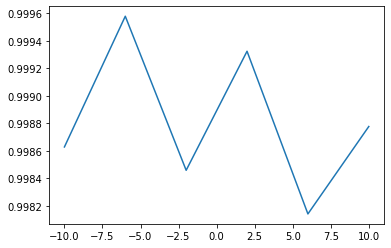

In [98]:
#HIDDEN-LAYER-1
#Matrix multiplication implemented here is essentially computing Ax=b
#b here is activation matrix of hidden layer-1 -In "LA" terms -b is the column space of Weight Matrix
#the multiplication used here is dot product- inner product
#Every row in the weight matrix is a vector transpose which is multiplied with the column vector B to get a scalar number
#The In vector is a matrix with each of those scalars
#In LA we see Ax=b but here we see Ax+c=b - the c indicates that the line essentially need not pass through the origin
#The bias is added to shift the learning curve to fit the data better and helps in complex problem solving
#We observe that there is a transformation from R100 to R6 and the weight matrix is the transformation matrix of order 6x100
#Hence we can conclude that R100 is the domain, R6 is the codomain
#N(W) gives the kernel and C(W) gives the range
#We understand two important concepts that were taught in LA that matrix multiplication transforms a vector from one space to another
#while matrix addition or scalar multiplication retains the vector in the same space and the resultant vectore is just a linear combination
#vectors.


W=np.random.random(size=(6,100)) 
bias=np.array([1,1,1,1,1,1]).reshape(6,1)

In=W.dot(B)
In1 = In + bias
A1=1/(1+np.exp(-In1))
print(A1)

g = np.linspace(-10, 10, 6) 
plt.plot(g,A1)

2nd Hidden layer - 6 neurons (2/3 of the Input layer)
Weight-Matrix -6x6
Input Matrix- 6x1
Bias matrix - 6x1
Output Matrix - 6x1



[[0.98641868]
 [0.98956715]
 [0.97690542]
 [0.93846135]
 [0.98322547]
 [0.97163375]]


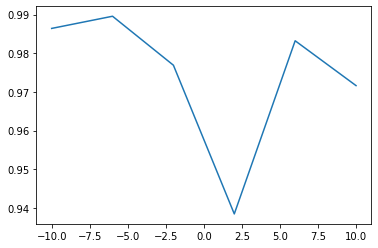

In [111]:
#2nd hidden layer
#Transformation from R6->R6
#Transformation matrix is W1

W1=np.random.random(size=(6,6)) 
bias1=np.array([1,1,1,1,1,1]).reshape(6,1)
In2=W1.dot(A1)
A2=1/(1+np.exp(-(W1.dot(A1)+bias1)))
print(A2)
g = np.linspace(-10, 10, 6) 
plt.plot(g,A2)


[[0.98303396]
 [0.96878589]]


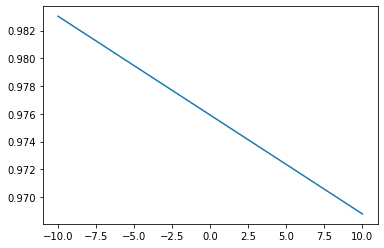

In [100]:
#output layer- binary classification problem
#output has 2 neurons
#perform one hot encoding on them
#mapping of these 6 neurons to the output layer
#Transformation from R6->R2
#Transformation matrix is W2

W2=np.random.random(size=(2,6)) 
bias2=np.array([1,1]).reshape(2,1)
output=1/(1+np.exp(-(W2.dot(A2)+bias2)))
print(output)
g = np.linspace(-10, 10, 2) 
plt.plot(g,output)


# PCA -Eigen Value Decomposition

The problem of multi-dimensional data is its visualization, which would make it quite tough to follow our example principal component analysis (at least visually). We could also choose a 2-dimensional sample data set for the following examples, but since the goal of the PCA in an “Diminsionality Reduction” application is to drop at least one of the dimensions, I find it more intuitive and visually appealing to start with a 3-dimensional dataset that we reduce to an 2-dimensional dataset by dropping 1 dimension.

In [9]:
import numpy as np

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"


Populating the interactive namespace from numpy and matplotlib


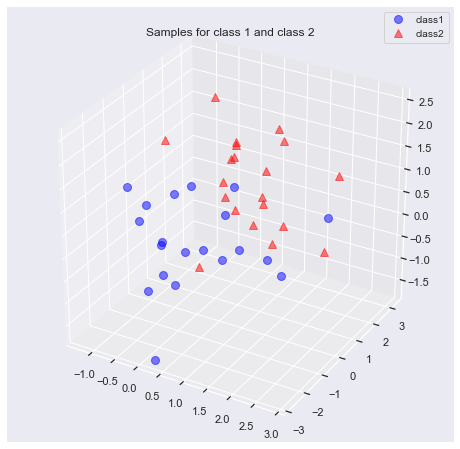

In [10]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [11]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), 

In [12]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.53876039]
 [0.15028214]
 [0.45658144]]


### Computing the Scatter Matrix and Co-variance matrix

In [15]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[39.22879902  7.2151764  10.85457489]
 [ 7.2151764  55.27359646 10.85742451]
 [10.85457489 10.85742451 44.2821239 ]]


In [13]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.00586664 0.18500452 0.27832243]
 [0.18500452 1.4172717  0.2783955 ]
 [0.27832243 0.2783955  1.13543907]]


### Computing eigenvectors and corresponding eigenvalues
We will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.

In [16]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.40138431]
 [-0.73881533]
 [-0.54133404]]
Eigenvalue 1 from scatter matrix: 67.14875880700167
Eigenvalue 1 from covariance matrix: 1.7217630463333746
Scaling factor:  39.000000000000036
----------------------------------------
Eigenvector 2: 
[[-0.75796592]
 [-0.06385543]
 [ 0.64916111]]
Eigenvalue 2 from scatter matrix: 30.540229455955384
Eigenvalue 2 from covariance matrix: 0.7830828065629585
Scaling factor:  39.00000000000001
----------------------------------------
Eigenvector 3: 
[[ 0.5141773 ]
 [-0.67087584]
 [ 0.53436628]]
Eigenvalue 3 from scatter matrix: 41.09553112048022
Eigenvalue 3 from covariance matrix: 1.0537315671918
Scaling factor:  39.00000000000002
----------------------------------------


In [17]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


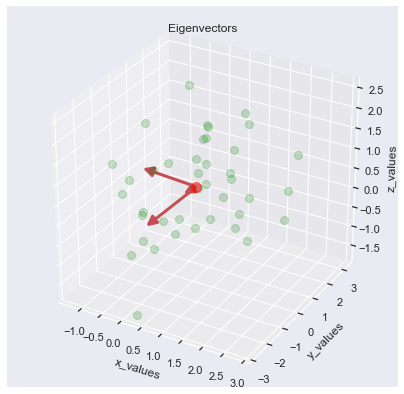

In [18]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

### Sorting the eigenvectors by decreasing eigenvalues
We started with the goal to reduce the dimensionality of our feature space, i.e., projecting the feature space via PCA onto a smaller subspace, 
where the eigenvectors will form the axes of this new feature subspace.

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors
with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.

In [19]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [20]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

67.14875880700167
41.09553112048022
30.540229455955384


### Choosing k eigenvectors with the largest eigenvalues
For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, 
we are combining the two eigenvectors with the highest eigenvalues to construct our d×k-dimensional
eigenvector matrix WW.

In [21]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.40138431  0.5141773 ]
 [-0.73881533 -0.67087584]
 [-0.54133404  0.53436628]]


### Transforming the samples onto the new subspace
In the last step, we use the 2×3-dimensional matrix WW that we just computed to transform our samples onto the new subspace 
via the equation y=WT × x.

In [22]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), 

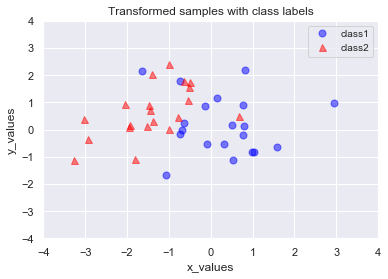

In [23]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()